In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Lab | Customer Analysis Round 4

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.
Get the data

We are using the marketing_customer_analysis.csv file.
Dealing with the data

Already done in the round 2.
Explore the data

Done in the round 3.
Processing Data

    Get the numeric data.
    Check normality.
    Check multicollinearity.


### Get the numeric data.

In [2]:
marketing_customer_analysis = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
marketing_customer_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [4]:
marketing_customer_analysis.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
filtered_data = marketing_customer_analysis[['Customer Lifetime Value','Income','Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies','Total Claim Amount']]

In [6]:
filtered_data

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


### Check normality.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C424D28088>,
      dtype=object)

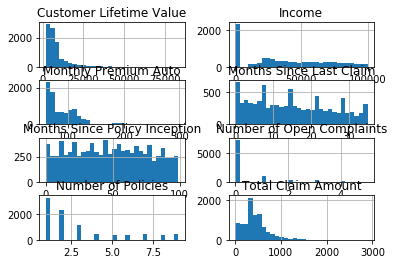

In [24]:
filtered_data.hist(layout = (4,2), bins=30)

### The distributions are not normal (gaussian)

### Check for multicollinearity

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [16]:
# Calculation of VIF using Statsmodels 
# creating dummies for gender 
from statsmodels.stats.outliers_influence import variance_inflation_factor  
# the independent variables set 
filtered_data

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = filtered_data.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(filtered_data.values, i) 
                          for i in range(len(filtered_data.columns))] 
print(vif_data)

                         feature        VIF
0        Customer Lifetime Value   2.806978
1                         Income   2.831329
2           Monthly Premium Auto  14.130566
3        Months Since Last Claim   2.784766
4  Months Since Policy Inception   3.267760
5      Number of Open Complaints   1.166620
6             Number of Policies   2.299313
7             Total Claim Amount   6.666879


### There seems to be a strong correlation between Monthly Premium and Total claim